In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import csv
import pandas as pd
import io
import os
import cv2
from pandas.errors import EmptyDataError
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization, Input 
from sklearn.model_selection import train_test_split
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
import time

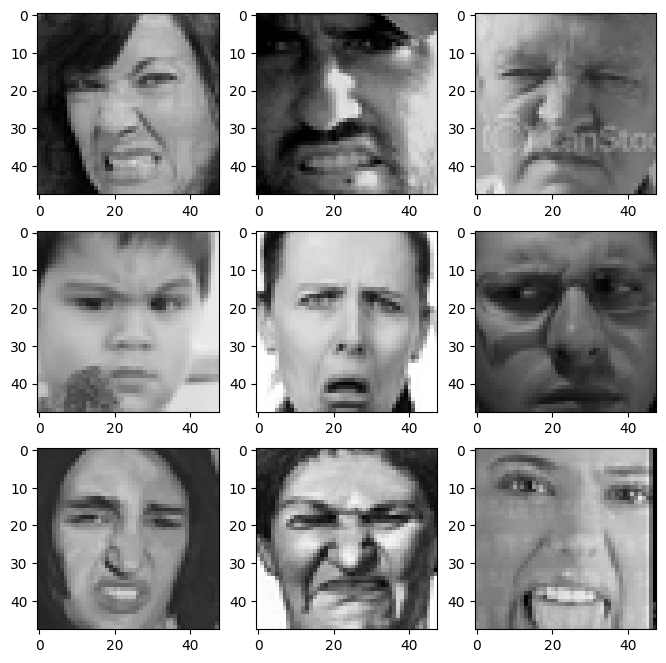

In [2]:
from tensorflow.keras.preprocessing.image import load_img
folder_path = 'Image/'
expression = 'disgusted'
imga='Training_3908.jpg/'

picturesize=48
plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                os.listdir(folder_path + "train/" + expression)[i], target_size=(picturesize, picturesize))
    plt.imshow(img)   
plt.show()

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [8]:
pretrained_model = tf.keras.applications.ResNet50(
    input_shape=(300, 300, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

In [9]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    'images1/train/',
    labels='inferred',
    label_mode='categorical',
    image_size=(300, 300),
    batch_size=32
)

Found 28044 files belonging to 7 classes.


In [10]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    'images1/test/',
    labels='inferred',
    label_mode='categorical',
    image_size=(300, 300),
    batch_size=32
)

Found 7177 files belonging to 7 classes.


In [11]:
pretrained_model.trainable = False
inputs = pretrained_model.input

conv1 = Conv2D(32, kernel_size=4, activation='relu')(inputs)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(64, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(128, kernel_size=4, activation='relu')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = Conv2D(64, kernel_size=4, activation='relu')(pool3)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

conv5 = Conv2D(32, kernel_size=4, activation='relu')(pool4)
pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)

flat = Flatten()(pool5)

hidden1 = Dense(128, activation='relu')(flat)
hidden2 = Dense(128, activation='relu')(hidden1)
hidden3 = Dense(64, activation='relu')(hidden2)
outputs = Dense(7, activation='softmax')(hidden3)

In [12]:
#Build a custom model on top of the pre-trained ResNet50 model with Conv2D, MaxPooling2D,  Dense, Flatten, and BatchNormalization layers.
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(7, activation='softmax')(x)

In [13]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

#Compile the model with 'adam' optimizer, 'categorical_crossentropy' loss function, and 'accuracy' metric.
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [14]:
# Train the model
start_time = time.time()
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

Epoch 1/20
877/877 [==============================] - 1002s 1s/step - loss: 1.4471 - accuracy: 0.4440 - val_loss: 1.4249 - val_accuracy: 0.4492
Epoch 2/20
877/877 [==============================] - 1009s 1s/step - loss: 1.2749 - accuracy: 0.5196 - val_loss: 1.3033 - val_accuracy: 0.5069
Epoch 3/20
877/877 [==============================] - 1018s 1s/step - loss: 1.2085 - accuracy: 0.5426 - val_loss: 1.2620 - val_accuracy: 0.5215
Epoch 4/20
877/877 [==============================] - 1009s 1s/step - loss: 1.1588 - accuracy: 0.5645 - val_loss: 1.2501 - val_accuracy: 0.5348
Epoch 5/20
877/877 [==============================] - 949s 1s/step - loss: 1.1145 - accuracy: 0.5800 - val_loss: 1.2573 - val_accuracy: 0.5338
Epoch 6/20
877/877 [==============================] - 937s 1s/step - loss: 1.0791 - accuracy: 0.5927 - val_loss: 1.2438 - val_accuracy: 0.5388
Epoch 7/20
877/877 [==============================] - 961s 1s/step - loss: 1.0421 - accuracy: 0.6099 - val_loss: 1.2632 - val_accuracy: 0.

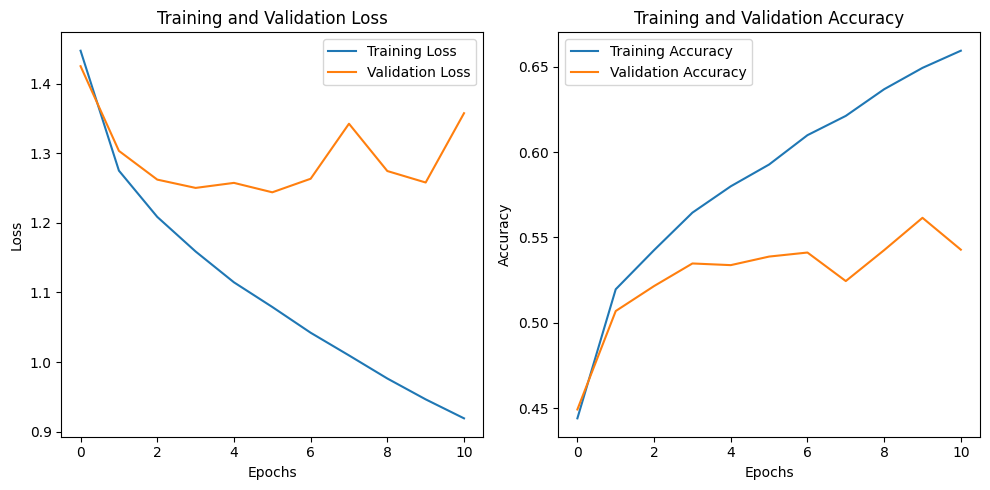

In [16]:
import matplotlib.pyplot as plt

# Extracting the data from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
try:
    train_acc = history.history['accuracy']  # This key might be different depending on the version, sometimes it's 'acc'
    val_acc = history.history['val_accuracy']  # This might also be 'val_acc'
except KeyError:
    train_acc = history.history['acc']
    val_acc = history.history['val_acc']

# Plotting Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
